# Proyecto final - Lucas Esteban
## Análisis de satisfacción de clientes de una aerolínea

Este proyecto trata sobre las valoraciones de usuarios (si quedaron satisfechos con el vuelo o no) de una aerolínea. Se analizarán variables como edad, tipo de viaje, genero del cliente, clase del vuelo, distancia del vuelo, demora de partida, demora de llegada, entre otras variables que refieren a las comodidades y caracteristicas del vuelo.

### Hipótesis de interés:
- Las demoras de partida y llegada importan en la valoración del cliente.
- La distancia del vuelo tiene injerencia sobre la valoración.
- La facilidad para el check in online y el Wifi en el vuelo son importante para los clientes.
- La clase y tipo del viaje influye sobre la valoración.

### Objetivo:
- Demostrar las hipótesis anteriormente planteadas mediante gráficos.
- Identificar las tendencias en los datos.
- Realizar un modelo que pueda predecir con los datos anteriormente planteados si un usuario va a estar satisfecho o no.

### Impacto:
- Entender que factores influyen con mayor peso en la satisfaccion de los clientes.
- Desarrollar nuevas estrategias para mejorar la cantidad de clientes satisfechos.

### Importo el dataframe

El dataframe que elegi en kaggle ya tenia dividido los datos en train y test

In [268]:
import pandas as pd
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [270]:
nulos_por_columna = df.isnull().sum()

print(nulos_por_columna)

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Se puede observar que la columna 'Arrival Delay in Minutes' tiene nulos asi que procedo a remplazar los nulos por la mediana y tambien elimino las columnas que no se van a utilizar.

In [271]:
columnas_a_eliminar = ["Unnamed: 0","id", "Cleanliness", "Baggage handling", "Leg room service", "On-board service"]

df = df.drop(columns=columnas_a_eliminar)
df_test = df_test.drop(columns=columnas_a_eliminar)

In [272]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis=0))
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].median(axis=0))

In [273]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
Checkin service                      0
Inflight service                     0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Se puede ver que ya no quedaron valores nulos en el dataframe

In [274]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.304290,3.640428,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.265396,1.175663,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Se pueden extraer las siguientes conclusiones:
-La edad promedio de los pasajeros es de 39.38 años.

-Los retrasos en la salida varían significativamente. La media indica que, en promedio, los vuelos tienen un pequeño retraso, pero la alta desviación estándar sugiere que algunos vuelos tienen retrasos muy largos.

-Similar a los retrasos en la salida, los retrasos en la llegada muestran una gran variabilidad, con una media que indica un retraso promedio pequeño.

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Gráficos

### Podemos empezar viendo el porcentaje de clientes satisfechos y no satisfechos

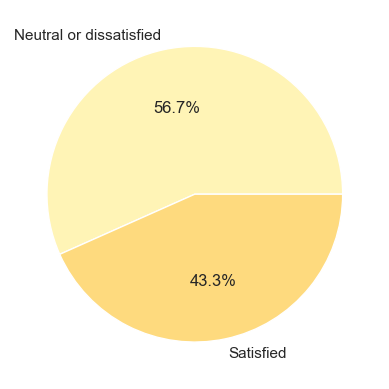

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Se puede ver que el 43,3% de los pasajeros esta satisfecho y el 56,7 no lo esta.

In [285]:
numeric_data = df.select_dtypes(include=['number'])
corr_mat = numeric_data.corr()
print(corr_mat)

                                        Age  Flight Distance  \
Age                                1.000000         0.099461   
Flight Distance                    0.099461         1.000000   
Inflight wifi service              0.017859         0.007131   
Departure/Arrival time convenient  0.038125        -0.020043   
Ease of Online booking             0.024842         0.065717   
Gate location                     -0.001330         0.004793   
Food and drink                     0.023000         0.056994   
Online boarding                    0.208939         0.214869   
Seat comfort                       0.160277         0.157333   
Inflight entertainment             0.076444         0.128740   
Checkin service                    0.035482         0.073072   
Inflight service                  -0.049427         0.057540   
Departure Delay in Minutes        -0.010152         0.002158   
Arrival Delay in Minutes          -0.012105        -0.002470   

                                   Infl

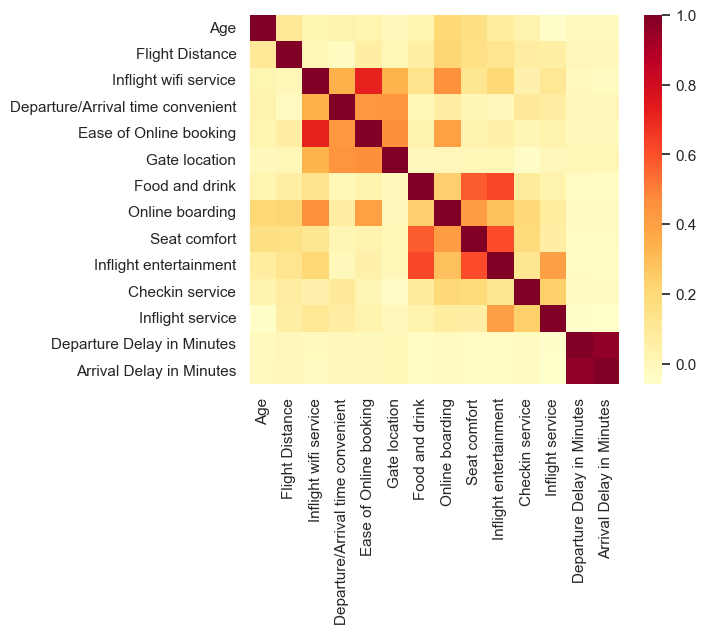

In [278]:
sns.heatmap(corr_mat, square = True, cmap = 'YlOrRd')
pass

Se puede ver que existe una fuerte correlación entre las características 'Retraso de salida en minutos' y 'Retraso de llegada en minutos'. El valor del coeficiente de correlación se podra observar con el siguiente calculo:

In [279]:
import numpy as np
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.960247
Inflight wifi service       Ease of Online booking      0.715856
Food and drink              Inflight entertainment      0.622512
Seat comfort                Inflight entertainment      0.610590
Food and drink              Seat comfort                0.574556
dtype: float64

## Diagrama de dispersión

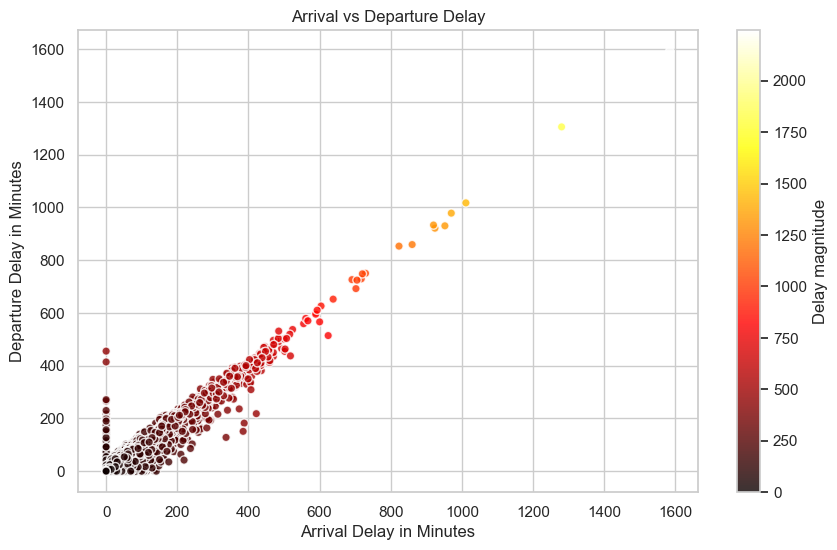

In [280]:

x = df['Arrival Delay in Minutes']
y = df['Departure Delay in Minutes']

colors = np.sqrt(x**2 + y**2) 

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, cmap='hot', alpha=0.8, edgecolor='w')

plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.title('Arrival vs Departure Delay')

plt.colorbar(label='Delay magnitude')

plt.show()

Los resultados obtenidos son bastante lógicos y se pueden explicar de la siguiente manera. Si el vuelo de los clientes de la aerolínea se retrasó una cierta cantidad de tiempo en la salida, entonces el vuelo se retrasará aproximadamente la misma cantidad de tiempo en el aterrizaje. 

## Gráfico de lineas segun check in online y satisfaccion

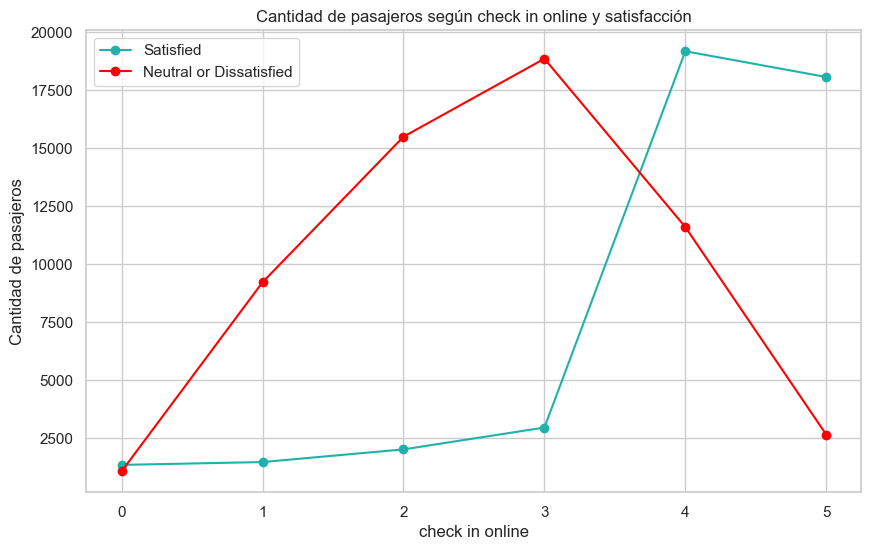

In [284]:
filtered_df = df[df['satisfaction'].isin(['neutral or dissatisfied', 'satisfied'])]

age_satisfaction_count = filtered_df.groupby(['Online boarding', 'satisfaction']).size().unstack()

plt.figure(figsize=(10, 6))

plt.plot(age_satisfaction_count.index, age_satisfaction_count['satisfied'], label='Satisfied', color='lightseagreen', marker='o')

plt.plot(age_satisfaction_count.index, age_satisfaction_count['neutral or dissatisfied'], label='Neutral or Dissatisfied', color='red', marker='o')

plt.title('Cantidad de pasajeros según check in online y satisfacción')
plt.xlabel('check in online')
plt.ylabel('Cantidad de pasajeros')
plt.legend()

plt.show()

Se puede ver que los clientes que tuvieron facilidad para hacer el check in online tienden a estar mucho mas satisfechos que los que lo encontraron dificil.

## Gráficos segun distancia de vuelo y tipo de clase

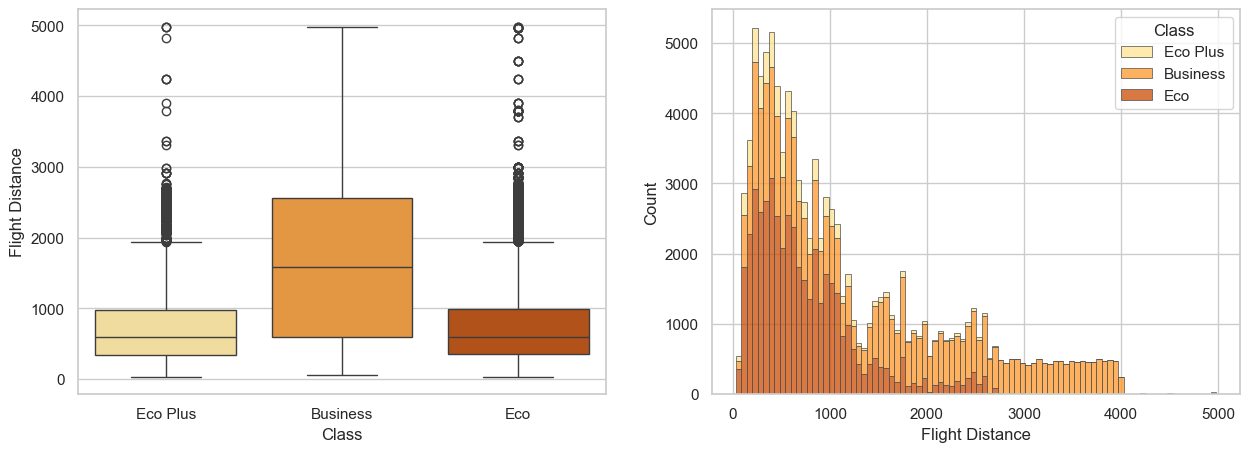

In [188]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x="Class", y="Flight Distance", hue="Class", palette="YlOrBr", data=df, ax=ax[0], dodge=False, legend=False)

sns.histplot(df, x="Flight Distance", hue="Class", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1])

plt.show()

De este diagrama de caja se puede extraer la siguiente conclusión: los clientes cuya distancia de vuelo es larga, en su mayoría vuelan en clase ejecutiva.

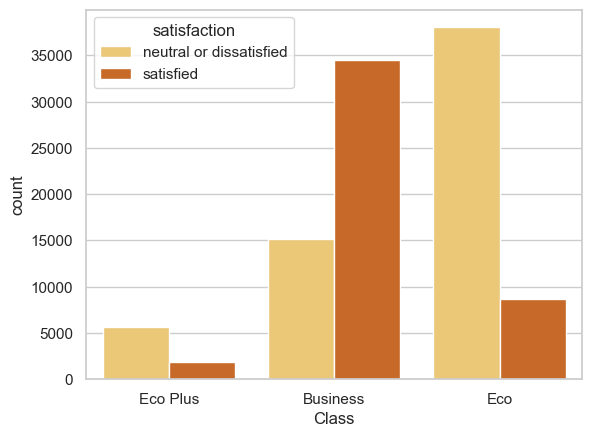

In [189]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

En este gráfico se puede ver muy evidente que la mayoría de los pasajeros que volaron en clase económica plus o económica no estaban satisfechos con el vuelo, y los que tuvieron la suerte de volar en clase ejecutiva estaban satisfechos.

### Transformamos las columnas que no son numericas:

In [190]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    
    return df

train = process_data(df)
test = process_data(df_test)

In [191]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,4,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,4,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,1,4,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,3,0,0.0,1


### Seleccionamos las columnas que vamos a utilizar para predecir:

<Axes: >

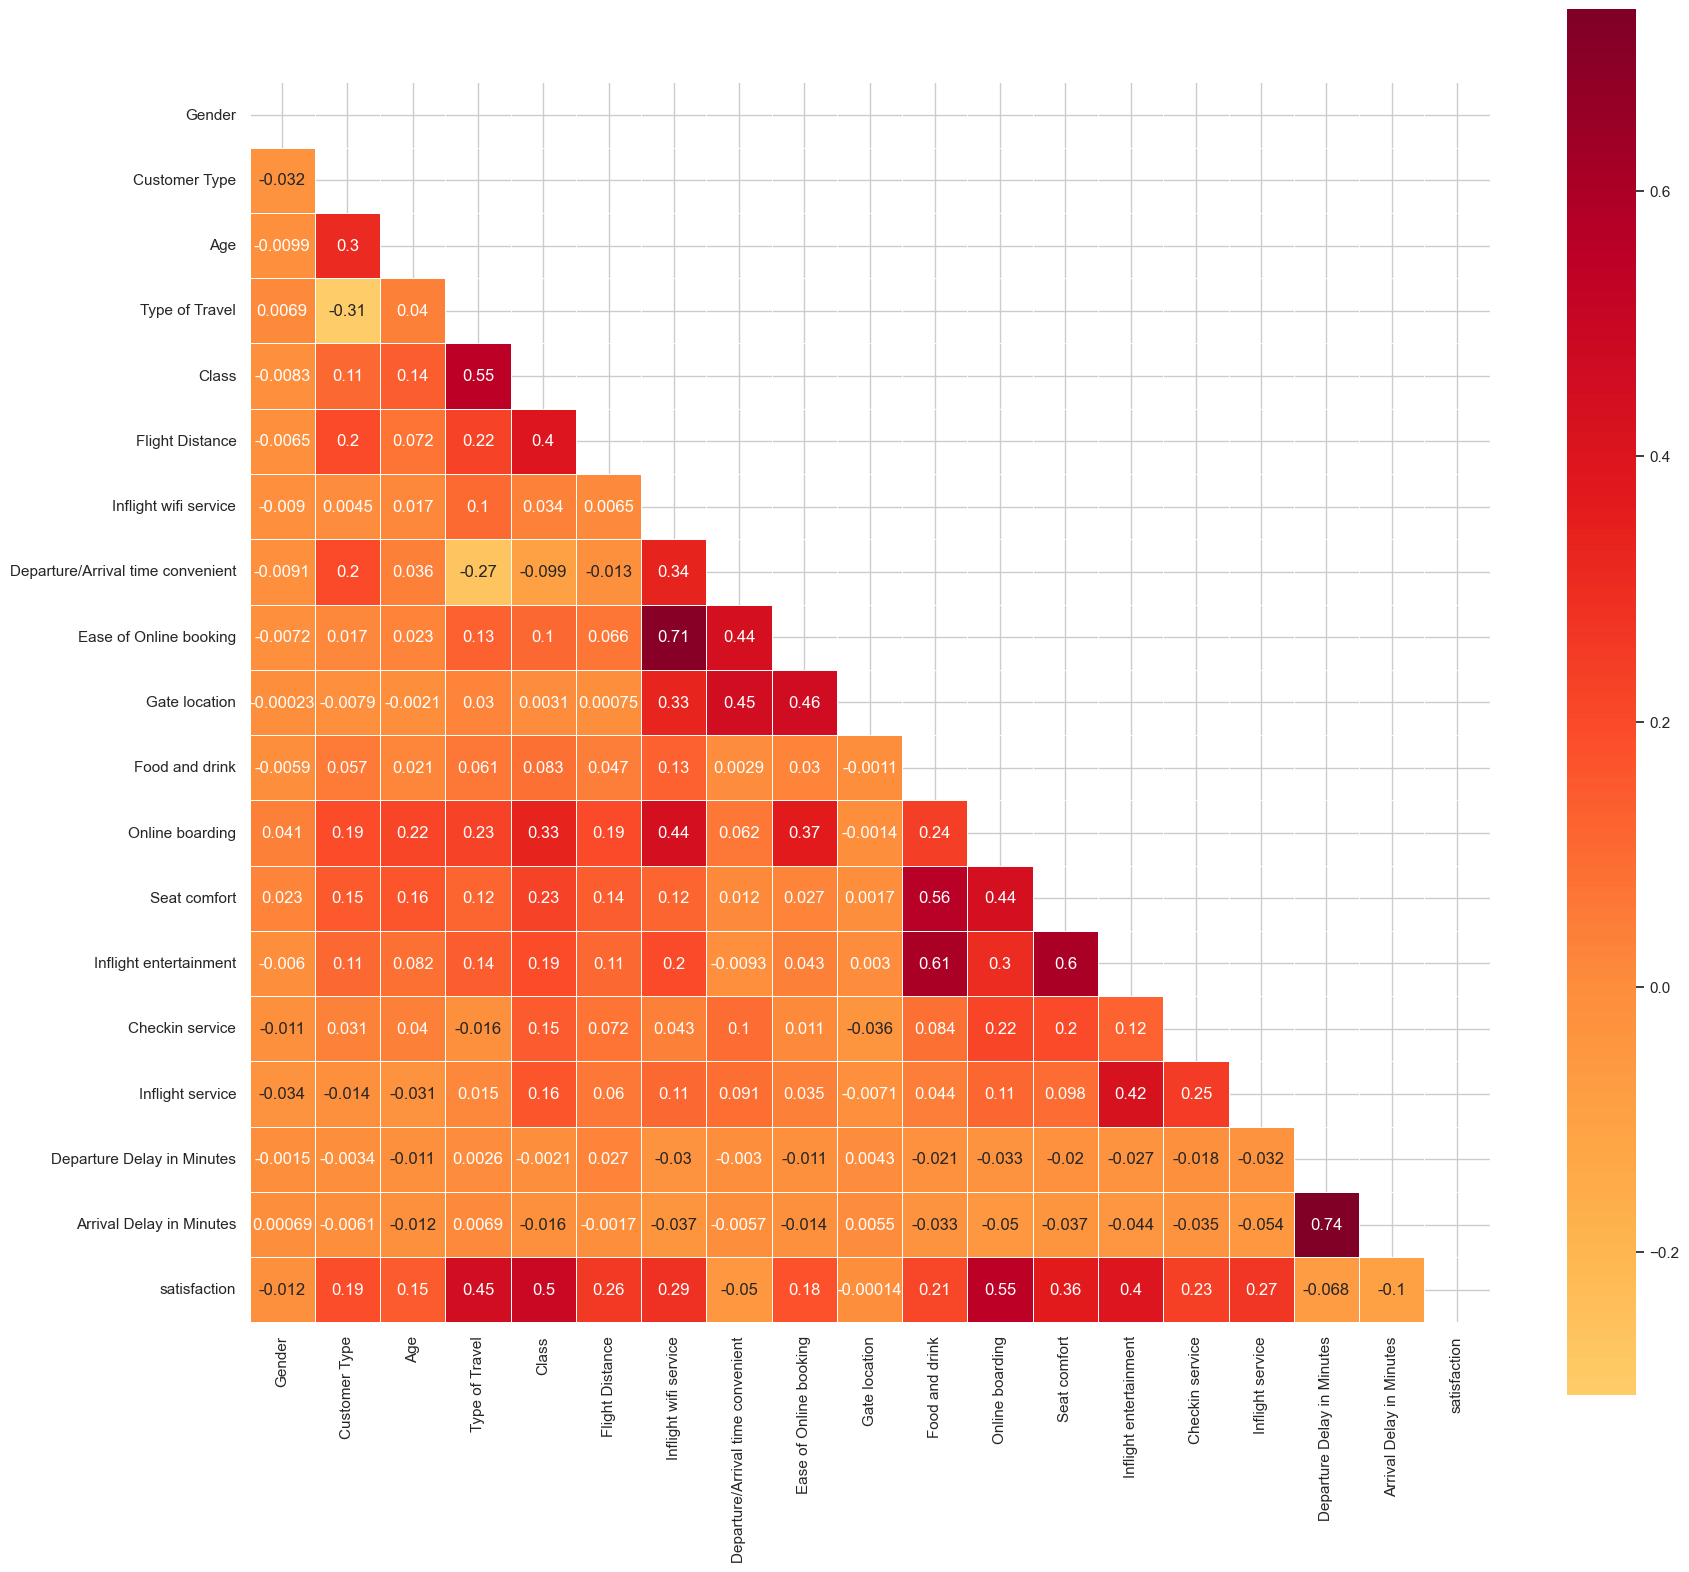

In [229]:
corr = train.corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(20, 18))


sns.heatmap(corr, annot = True, mask=mask, cmap="YlOrRd", center=0,
            square=True, linewidths=.5)

-Vemos que las Mejores columnas para la clasificación son: Online Booking, Class y Type of Travel

-Tambien vemos que a diferencia de lo planteado en uno de los incisos de la hipotesis, el retraso de salida y llegada no son tan importantes en la satisfaccion del cliente. 

In [251]:
from sklearn.preprocessing import StandardScaler
features = ['Inflight wifi service', 'Type of Travel', 'Class',
       'Flight Distance', 'Ease of Online booking'
        
        ]
target = ['satisfaction']


X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [246]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Funcion para entrenar los modelos y evaluarlos
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    model.fit(X_train, y_train)  
    
    y_pred = model.predict(X_test)
    
    if len(np.unique(y_test)) == 2:
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    
    print(f"ROC_AUC = {roc_auc:.5f}")
    
    print(classification_report(y_test, y_pred, digits=5))
    
    cm = confusion_matrix(y_test, y_pred, normalize='all')
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='YlOrRd')
    
    return model, roc_auc


Probaremos algunos modelos diferentes para ver cuál es la mejor opción para nuestro problema. He creado una función a continuación que entrenará, predecirá y evaluará todos nuestros modelos. Evaluaremos el rendimiento de nuestros modelos con la métrica ROC_AUC. También veremos la matriz de confusión de nuestro modelo para comprender mejor cómo nuestro modelo caracteriza erróneamente las predicciones.

### Random Forest

ROC_AUC = 0.93519
              precision    recall  f1-score   support

           0    0.87310   0.84979   0.86129     14573
           1    0.81437   0.84215   0.82802     11403

    accuracy                        0.84644     25976
   macro avg    0.84373   0.84597   0.84465     25976
weighted avg    0.84731   0.84644   0.84668     25976



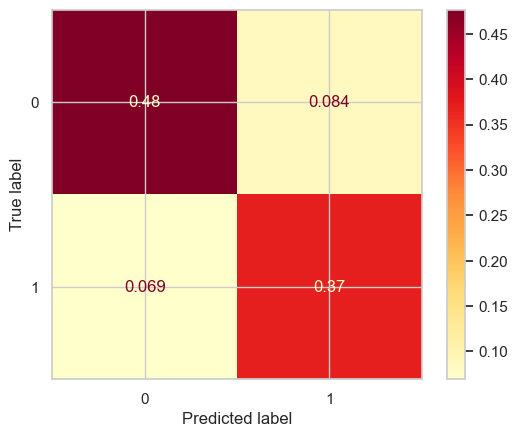

In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_auc_score
params_rf = {'max_depth': 25,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 1200,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)

model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train.ravel(), X_test, y_test.ravel())


### LightGBM

[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268267
[LightGBM] [Info] Start training from score -0.268267
ROC_AUC = 0.95020
              precision    recall  f1-score   support

           0    0.89328   0.87415   0.88361     14573
           1    0.84345   0.86653   0.85483     11403

    accuracy                        0.87080     25976
   macro avg    0.86836   0.87034   0.86922     25976
weighted avg    0.87140   0.87080   0.87098     25976



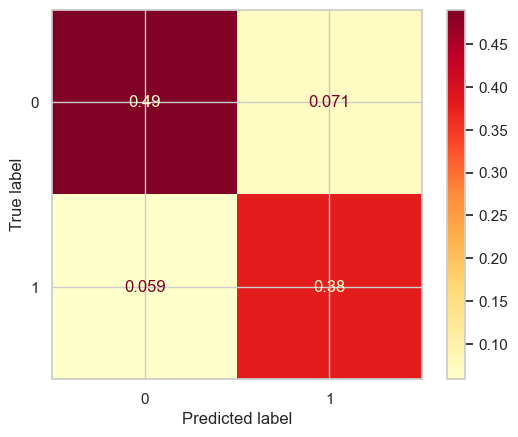

In [253]:
import lightgbm as lgb


params_lgb = {
    'colsample_bytree': 0.8,
    'max_depth': -1,  
    'min_split_gain': 0.0,  
    'n_estimators': 100,
    'num_leaves': 31,  
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'subsample': 0.8,
    'subsample_freq': 1,
}


model_lgb = lgb.LGBMClassifier(**params_lgb)

model_lgb, roc_auc_lgb = run_model(model_lgb, X_train, y_train.ravel(), X_test, y_test.ravel())


### K-Nearest Neighbors

ROC_AUC = 0.92248
              precision    recall  f1-score   support

           0    0.87297   0.86955   0.87126     14573
           1    0.83412   0.83829   0.83620     11403

    accuracy                        0.85583     25976
   macro avg    0.85354   0.85392   0.85373     25976
weighted avg    0.85591   0.85583   0.85587     25976



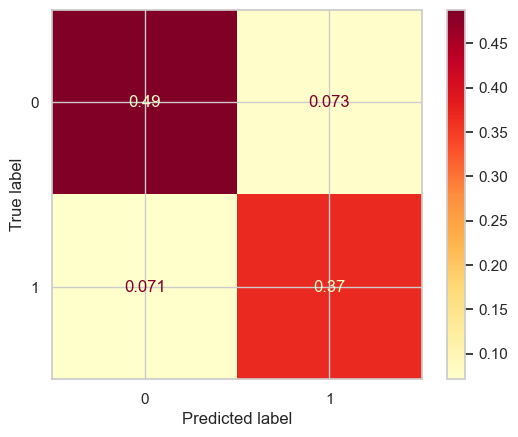

In [254]:
from sklearn.neighbors import KNeighborsClassifier

params_knn = {
    'n_neighbors': 5,  
    'weights': 'uniform',  
    'algorithm': 'auto', 
}

model_knn = KNeighborsClassifier(**params_knn)

model_knn, roc_auc_knn = run_model(model_knn, X_train, y_train.ravel(), X_test, y_test.ravel(), verbose=False)


### XGBoost

ROC_AUC = 0.65084
              precision    recall  f1-score   support

           0    0.57966   0.99986   0.73387     14573
           1    0.99762   0.07340   0.13674     11403

    accuracy                        0.59316     25976
   macro avg    0.78864   0.53663   0.43531     25976
weighted avg    0.76314   0.59316   0.47174     25976



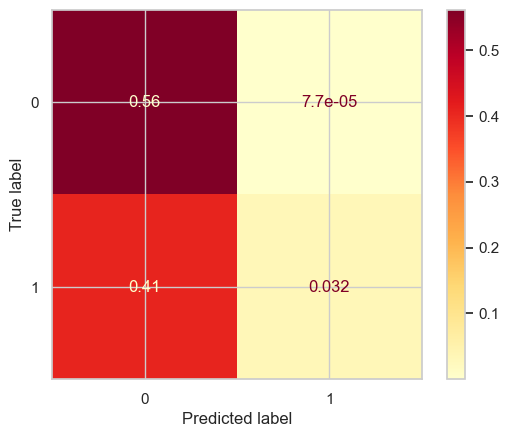

In [286]:
import xgboost as xgb
params_xgb ={}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### Conclusiones en los datos:
-Se pudo ver que la influencia de el check in online en la satisfacción es algo concluyente y tambien que el wifi durante el vuelo es importante para el cliente.

-Los tiempos de demora tanto de partida como de llegada tienen una correlacion muy fuerte entre ellos pero no son tan influyentes en la satisfaccion o no de los clientes.

-El factor de en que clase viaja el cliente y el tipo de viaje tambien tiene un peso significativo , sobre todo en vuelos de largas distancias, ya que la clase ejecutiva es mas elegida para viajes largos.


### Conclusiones de la clasificación:

Habiendo probado cuatro modelos para realizar la clasificación podemos decir que el modelo mas preciso fue el LightGBM


Siendo los resultados de los modelos:

LightGBM:              0.95020

Random Forrest:        0.93519

KNN:                   0.92248

XGBoost:               0.65084
